# Pytorch

Pytorch는 TensorFlow와 함께 Deep Learning에서 가장 널리 사용되는 framework이다.

초기에는 Torch라는 이름으로 Lua 언어 기반으로 만들어졌으나, 이후 python 기반으로 변경한 것이 Pytorch이다.

### Pytorch Example Code



In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# MNIST dataset

# train dataset
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# test dataset
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
batch_size = 64

# dataloader 생성
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [ ]:
# 학습에 필요한 CPU or GPU 선택
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# model 정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),            
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# loss function, optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# train
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # error
        pred = model(X)
        loss = loss_fn(pred, y)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
# test
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.334904  [    0/60000]
loss: 0.458666  [ 6400/60000]
loss: 0.322289  [12800/60000]
loss: 0.384313  [19200/60000]
loss: 0.241659  [25600/60000]
loss: 0.344225  [32000/60000]
loss: 0.183482  [38400/60000]
loss: 0.365332  [44800/60000]
loss: 0.279514  [51200/60000]
loss: 0.324370  [57600/60000]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.199876 

Epoch 2
-------------------------------
loss: 0.156663  [    0/60000]
loss: 0.180489  [ 6400/60000]
loss: 0.116627  [12800/60000]
loss: 0.198470  [19200/60000]
loss: 0.162027  [25600/60000]
loss: 0.240692  [32000/60000]
loss: 0.069859  [38400/60000]
loss: 0.219869  [44800/60000]
loss: 0.177305  [51200/60000]
loss: 0.198869  [57600/60000]
Test Error: 
 Accuracy: 95.7%, Avg loss: 0.137481 

Epoch 3
-------------------------------
loss: 0.086381  [    0/60000]
loss: 0.112924  [ 6400/60000]
loss: 0.091123  [12800/60000]
loss: 0.088221  [19200/60000]
loss: 0.113305  [25600/60000]
loss: 0.174592  [32000/600

image.png 파일을 직접 만들어, upload하여 test 해보기

In [ ]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass
# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
image = torch.as_tensor(image).to(device).reshape(1,1,28,28)
model.eval()
predict = model(image)
print("Model이 예측한 값은 {} 입니다.".format(predict.argmax(1).item()))

## Pytorch Basic

### Pytorch import

In [3]:
import torch

print(torch.__version__)

2.1.1


### Tensor

텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조이다. PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)한다.

In [4]:
!nvidia-smi

Thu Jan 25 14:16:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.01                 Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  | 00000000:01:00.0  On |                  N/A |
| 30%   36C    P0              36W / 170W |   1750MiB / 12288MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# tesnor 생성
print(torch.tensor([[1,2],[3,4]])) # 2차원 형태의 텐서 생성
print('----------------------------')
print(torch.tensor([[1,2],[3,4]], device="cuda:0")) # o(index)번째 GPU에 텐서 생성
print('----------------------------')
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64)) # dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
----------------------------
tensor([[1, 2],
        [3, 4]], device='cuda:0')
----------------------------
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [10]:
# tensor.size()는 텐서의 크기를 확인할 수 있음
# tensor.shape과 동일
# tensor.dim()은 tensor의 차원을 확인할 수 있음
x = torch.tensor([1,2])
y = torch.tensor([[1,2], [3,4]])
print(x.size(), x.shape, x.dim())
print(y.size(), y.shape, x.dim())

torch.Size([2]) torch.Size([2]) 1
torch.Size([2, 2]) torch.Size([2, 2]) 1


In [17]:
# list로부터 직접 tensor 생성하기 
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [21]:
# numpy array로부터 tensor 생성하기
# copy
# 새로운 tensor를 만드는 것이기 때문에 텐서를 수정해도 원본 값은 변하지 않음
# 메모리가 낭비 될 수 있기 때문에 주의
np_array = np.array(data)
x_np_1 = torch.tensor(np_array)
print(x_np_1)
print(id(np_array)) # 객체 주소
print(id(x_np_1)) # 객체 주소

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
2145842082608
2145842192256


In [ ]:
x_np_1[0,0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [22]:
# torch.as_tensor()
# copy가 아닌 view 생성
# 텐서를 수정하면 원본 값도 변함
# view를 생성한다는 것은 같은 주소를 가지는 객체를 생성하는 것이 아니라
# 메모리는 공유하지만 서로 다른 객체를 만드는 것임
# 따라서 메모리를 절약할 수 있고 값은 공유하지만 서로 다른 객체이므로 주소는 다름
x_np_2 = torch.as_tensor(np_array)
print(x_np_2)
print(id(np_array)) # 객체 주소
print(id(x_np_2)) # 객체 주소

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
2145842082608
2145842189216


In [ ]:
x_np_2[0,0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]])
[[6 2]
 [3 4]]


In [ ]:
# torch.from_numpy()
# copy가 아닌 view 생성
# 텐서를 수정하면 원본 값도 변함
x_np_3 = torch.from_numpy(np_array)
print(x_np_3)

tensor([[6, 2],
        [3, 4]])


In [ ]:
x_np_3[0,0] = 7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]])
[[7 2]
 [3 4]]


In [ ]:
# 텐서를 ndarray로 바꾸기
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [ ]:
# numpy와 문법 동일
a = torch.ones(2,3)
b = torch.zeros(2,3)
c = torch.full((2,3), 2)
d = torch.empty(2,3)
print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[3.1701e+21, 0.0000e+00, 0.0000e+00],
        [2.0000e+00, 0.0000e+00, 2.1250e+00]])


In [ ]:
e = torch.zeros_like(c)
f = torch.ones_like(c)
g = torch.full_like(c, 3)
h = torch.empty_like(c)
print(e)
print(f)
print(g)
print(h)

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[140005113846944,      1658884928,              32],
        [            128,      1664725392,               0]])


In [ ]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [ ]:
j = torch.arange(10) # 주어진 범위 내의 정수를 순서대로 생성 (0, end]
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
a = torch.rand(3,4) # 0과 1사이의 숫자를 균등하게 생성
b = torch.rand_like(a) # 지정 텐서와 동일한 사이즈로 생성

c = torch.randn(3,4) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
d = torch.randn_like(c)

e = torch.randint(10, size = (3,4)) # 주어진 범위 내의 정수를 균등하게 생성
f = torch.randint_like(e, 5)

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

tensor([[0.0297, 0.2331, 0.8087, 0.6117],
        [0.6118, 0.4511, 0.8345, 0.8596],
        [0.3772, 0.6658, 0.0338, 0.5782]])
tensor([[0.7163, 0.1444, 0.8425, 0.4491],
        [0.5078, 0.4495, 0.0550, 0.3369],
        [0.5905, 0.1523, 0.6178, 0.5269]])
tensor([[-2.2426,  0.5126, -0.0793,  0.8338],
        [-0.4640,  1.5559,  0.2704,  0.0115],
        [ 1.4587, -1.2365,  1.7921,  0.0247]])
tensor([[ 0.4899, -1.9159, -1.5156,  0.5659],
        [-0.9232,  0.9174,  0.3233, -0.8167],
        [ 0.2644,  0.0790, -0.7908, -0.6364]])
tensor([[9, 1, 1, 4],
        [4, 0, 0, 1],
        [4, 8, 9, 4]])
tensor([[1, 2, 0, 1],
        [0, 0, 2, 4],
        [0, 0, 3, 1]])


In [13]:
# 만약 tensor가 1개의 값(스칼라)만 가지면 
# tensor.item()메서드를 사용할 수 있음
# tensor.itme()은 tensor의 차원은 상관 없고 요소가 하나만 있으면 해당 요소를 int 혹은 float으로 반환할 수 있음
# tensor(2)에도 사용할 수 있고, tensor([2])에도 사용할 수 있음
tensor1 = torch.tensor([2])
tensor2 = torch.tensor(2)
print(tensor1, tensor1.size(), tensor1.dim())
print(tensor1.item())
print(tensor2, tensor2.size(), tensor2.dim())
print(tensor2.item())

tensor([2]) torch.Size([1]) 1
2
tensor(2) torch.Size([]) 0
2


In [ ]:
# tensor가 하나보다 많은 원소를 가지고 있으면
# tensor.item()을 할 수 없음
tensor = torch.tensor([[2,3]])
tensor.item()

ValueError: ignored

### Indexing과 Slicing

In [ ]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [ ]:
# 특정 인덱스를 사용하여 indexing
# 1번 행 전체를 인덱싱하기
print(a[1])
print(a[1, :]) # 위와 결과 동일

tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])


In [ ]:
# 1번 행, 2번 열 원소 indexing
a[1, 2]

tensor(7)

In [ ]:
# 1번 열 전체를 indexing
a[:, 1]

tensor([ 2,  6, 10])

In [ ]:
# indexing을 하면 numpy와 동일하게 차원이 줄어들음
print(a[1])
print(a[0,-1])

tensor([5, 6, 7, 8])
tensor(4)


In [ ]:
# 1번 행 이후 행의 모든 값 slicing
a[1:]

tensor([[ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [ ]:
# 1번 행 이후의 모든 행 & 3번 열 이후의 모든 열 slicing
a[1:, 3:]

tensor([[ 8],
        [12]])

In [ ]:
# slicing
# 차원 유지됨
print(a[1:-1])
print(a[:2, 2:]) # 두 개의 차원 모두 슬라이싱이 적용되어 어떠한 차원도 축소되지 않음

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


#### Tensor의 속성

In [4]:
tensor = torch.rand(3,4)

print(f'Rank of tensor : {tensor.dim()}')
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Rank of tensor : 2
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [15]:
# device 변경
# pytorch에서는 gpu에 tensor를 올리는 코드를 작성해야 함

# tensor를 gpu에 올리는 방법 1
if torch.cuda.is_available():
  tensor = tensor.to('cuda') # 'cuda:0'
 
# tensor를 gpu에 올리는 방법 2
tensor = torch.rand(3,4).cuda() # 'cuda(0)'

# tensor를 gpu에 올리는 방법 3
tensor = torch.tensor([3,4], device = 'cuda') # 'cuda:0'

print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Datatype of tensor: torch.int64
Device tensor is stored on: cuda:0


In [23]:
# 텐서의 크기 변환
# tensor.reshape()
# reshape()는 기존 tensor와 데이터를 공유하거나, 공유하지 않을 수도 있음
# reshape()은 contiguous하거나 non-contiguoug한 data 모두 사용할 수 있음
tensor = torch.ones(3,4)
tensor2 = tensor.reshape(4,3)

print(f"Shape of tensor: {tensor.shape}")
print(f"Shape of tensor2: {tensor2.shape}")

Shape of tensor: torch.Size([3, 4])
Shape of tensor2: torch.Size([4, 3])


In [ ]:
# 텐서의 크기 변환
# tensor.view()
# 기존 tensor와 데이터를 공유
# 만약 viewed된 tensor의 값이 변경된다면, 원본 tensor의 값도 변경됨
# view()는 contiguous한 data에만 사용할 수 있음
tensor = torch.ones(3,4)
tensor2 = tensor.view(4,3)

print(f"Shape of tensor: {tensor.shape}")
print(f"Shape of tensor2: {tensor2.shape}")

Shape of tensor: torch.Size([3, 4])
Shape of tensor2: torch.Size([4, 3])


### Transpose
- tensor.transpose()와 tensor.permute()는 view()와 마찬가지로 원본 tensor와 data를 공유하면서 새로운 tensor를 반환
- view()는 오직 contiguous tensor에서만 작동할 수 있고 반환하는 tensor 역시 contiguous 하다.
- transpose()와 permute()는 view()와 다르게 연산하고 출력도 다르다. contiguous tensor와 noncontiguous tensor 둘 다 작동한다.

In [24]:
x = torch.tensor([[1,2,3],[4,5,6]])
y = x.transpose(0,1)

In [25]:
print(x.data_ptr())
print(y.data_ptr())

2310629622144
2310629622144


In [26]:
print(x.is_contiguous()) # x[0][0]과 x[0][1]은 memory에서 인접하지만
print(y.is_contiguous()) # y[0][0]과 y[0][1]은 memory에서 인접하지 않음

True
False


In [27]:
a = torch.arange(16).reshape(2,2,4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [28]:
tensor = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
a = tensor.view(4,3) # view()는 원본 data의 순서를 변형하지 않음
b = tensor.transpose(0,1) # 축을 바꾸는 것이기 떄문에 데이터의 순서가 변경됨
print(a)
print(b)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11],
        [ 4,  8, 12]])


In [31]:
# transpose는 오직 2개의 축만 교환할 수 있음

a = torch.arange(16).reshape(2,2,4)
b = a.transpose(1, 2) # 1번축과 2번축을 바꿈
print(a, a.shape)
print(b, b.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])
tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [32]:
# permute는 모든 차원을 교환할 수 있음
a = torch.arange(16).reshape(2,2,4)
c = a.permute((2, 0, 1)) # 2번축, 0번축, 1번축 순으로 바꿈
print(a, a.shape)
print(c, c.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])
tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### Tensor 연산

In [58]:
x = torch.tensor([[1,2], [3,4]], dtype=torch.float32)
y = torch.tensor([[5,6], [7,8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [59]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x//y)
print(x**y)

print('='*30)

print(torch.add(x, y))
print(x.add(y))

print(torch.subtract(x, y))
print(x.subtract(y))

print(torch.multiply(x, y))
print(x.multiply(y))

print(torch.divide(x, y))
print(x.divide(y))

print(torch.matmul(x, y))
print(x.matmul(y))
print(x@y) # @ == matmul
# torch.dot(x,y)는 x와 y가 모두 1차원 tensor일때만 사용 가능

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1.0000e+00, 6.4000e+01],
        [2.1870e+03, 6.5536e+04]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


In [ ]:
# tensor.squeeze()
# squeeze() 함수는 차원이 1인 부분을 제거
# 예를 들어 (A x B x 1 x C x 1) 형태의 텐서에 squeeze()를 하면 (A x B x C) 형태가 됨

x = torch.ones(10, 5, 1, 3, 1)
x1 = x.squeeze()
print(x.shape)
print(x1.shape)

x2 = x.squeeze(dim = 2)
print(x2.shape)

torch.Size([10, 5, 1, 3, 1])
torch.Size([10, 5, 3])
torch.Size([10, 5, 3, 1])


In [ ]:
# tensor.unsqueeze()
# unsqueeze() 함수는 지정한 dimension자리에 size가 
# 1인 빈 공간을 채워주면서 차원을 확장

x = torch.ones(3,5,7)
x1 = x.unsqueeze(dim=1)
print(x.shape)
print(x1.shape)

torch.Size([3, 5, 7])
torch.Size([3, 1, 5, 7])


In [ ]:
# torch.add()가 아니라 tensor.add() 연산을 할 수 있음
# x와 y값은 변하지 않음
print(x.add(y))
print(x)

# tensor.add_() 메서드를 사용하면 inplace 연산을 수행함
# x와 y를 더한 값이 x에 저장됨
print(x.add_(y))
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [ ]:
z = torch.arange(1, 11).reshape(2, 5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [ ]:
# sum
# 축의 방향을 지정할 수 있음
sum = torch.sum(z) # 모든 원소들의 합
sum1 = torch.sum(z, axis=0) # 0번축 방향으로의 합
sum2 = torch.sum(z, axis=1) # 1번축 방향으로의 합
sum3 = torch.sum(z, axis=-1) # 1번축 방향으로의 합

print(sum, sum.shape)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor(55) torch.Size([])
tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [3]:
# max
# torch.max(data)
# data에서 가장 큰 값을 반환
tensor = torch.arange(12).reshape(3,4)
m = torch.max(tensor)
print(m)

tensor(11)


In [63]:
# max
# torch.max(data, dim)
# data에서 dimension을 기준으로 최대값과 index를 반환
tensor = torch.arange(12).reshape(3,4)
m = torch.max(tensor,1) # 1번축 방향으로 가장 큰 값과 index를 반환
print(m)
print(m.values)
print(m.indices)

torch.return_types.max(
values=tensor([ 3,  7, 11]),
indices=tensor([3, 3, 3]))
tensor([ 3,  7, 11])
tensor([3, 3, 3])


In [67]:
# argmax
# torch.argmax(data, dim)
# data에서 dimension을 기준으로 최댓값의 index를 반환
tensor = torch.arange(12).reshape(3,4)
print(torch.argmax(tensor))
print(torch.argmax(tensor, 0))
print(torch.argmax(tensor, 1))

tensor(11)
tensor([2, 2, 2, 2])
tensor([3, 3, 3])


In [2]:
# .detach()
# 기존 텐서에서 gradient 전파가 안되는 view를 생성
# 텐서의 require_grad 속성을 Flase로 변경하는 것과 동일

# .clone()
# 기존 텐서의 내용을 복사한 새로운 텐서 생성

tensor = torch.arange(24).reshape(2,2,6)
a = tensor.detach()
b = tensor.clone()
tensor[0,0,0] = 5
print(a)
print(b)

tensor([[[ 5,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11]],

        [[12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]])
tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11]],

        [[12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]])


In [6]:
# detach().cpu.numpy()
# 역전파가 진행이 되지 않도록 값을 복사하고
# 텐서를 cpu에 할당한 후
# ndarray로 변환
tensor = torch.tensor([1,2])
ndarray = tensor.detach().cpu().numpy()
print(ndarray, type(ndarray))

[1 2] <class 'numpy.ndarray'>


In [ ]:
# concat
# 0번 축 방향으로 concat
c = torch.cat([a, b], axis=0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [ ]:
# 1번축 방향으로 concat
c = torch.cat([a, b], axis=-1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


In [ ]:
# stack : 새로운 축을 만들면서 cat
# 0번 축 자리에 축을 하나 새로 만듦
d = torch.stack([a, b], axis=0)
print(d, d.shape)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]]) torch.Size([2, 4, 6])


In [ ]:
# stack
# 1번 축 자리에 축을 하나 새로 만듦
d = torch.stack([a, b], axis=1)
print(d, d.shape)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 0,  1,  2,  3,  4,  5]],

        [[ 6,  7,  8,  9, 10, 11],
         [ 6,  7,  8,  9, 10, 11]],

        [[12, 13, 14, 15, 16, 17],
         [12, 13, 14, 15, 16, 17]],

        [[18, 19, 20, 21, 22, 23],
         [18, 19, 20, 21, 22, 23]]]) torch.Size([4, 2, 6])


In [ ]:
# stack
# 마지막 축 자리에 축을 하나 새로 만듦
d = torch.stack([a, b], axis=-1)
print(d, d.shape)

tensor([[[ 0,  0],
         [ 1,  1],
         [ 2,  2],
         [ 3,  3],
         [ 4,  4],
         [ 5,  5]],

        [[ 6,  6],
         [ 7,  7],
         [ 8,  8],
         [ 9,  9],
         [10, 10],
         [11, 11]],

        [[12, 12],
         [13, 13],
         [14, 14],
         [15, 15],
         [16, 16],
         [17, 17]],

        [[18, 18],
         [19, 19],
         [20, 20],
         [21, 21],
         [22, 22],
         [23, 23]]]) torch.Size([4, 6, 2])


### PIL Image & Numpy Array Image & Pytorch Tensor Image

- PIL Image와 Numpy Array Image는 아래와 같은 구조를 가지고 있다.
    - Height x Width x Channel
    - Pixel value 범위 : 0 ~ 255


- Pytorch Tensor Image는 다음과 같은 구조를 가지고 있다.
    - Channel x Height x Width
    - Pixel value : 0 ~ 1


- Convert PILImage to Numpy Array Image
    ```python
    # PIL Image가 할당된 변수를 np.array()에 넣어주면 된다.
    # PIL Image와 Numpy array는 특징이 같기 때문에 서로 변환을 하여도 pixel value는 0~255 사이 값으로 동일하고 Height x Width x Channel 순으로 구성되어 있다.
    img_array = np.array(img) 
    ```


- Convert Numpy Array to PIL Image
    ```python
    # Numpy Array가 할당된 변수를 그냥 PIL.Image.fromarray()에 넣어주면 된다.
    # PIL Image와 Numpy array는 특징이 같기 때문에 서로 변환을 하여도 pixel value는 0~255 사이 값으로 동일하고 Height x Width x Channel 순으로 구성되어 있다.
    img_1 = Image.fromarray(img_array) 
    ```


- Convert PIL & Numpy Array image to Pytorch Tensor
    ```python
    # 먼저 object를 만들어주고
    # PIL & Numpy Array가 할당된 변수를 object에 넣어준다
    # PIL Image와 Numpy Image를 Pytorch tensor image로 바꾸면 pixel value가 0~1 사이의 범위로 변하고, Channel x Height x Width 순으로 변한다
    totensor = torchvision.transforms.ToTensor() # object 생성
    tensor_pil = totensor(img)
    tensor_numpy = totensor(img_array)
    ```


- Convert Pytorch Tensor to PIL Image
    ```python
    # 먼저 object를 만들고
    # image Tensor가 할당된 변수를 object에 넣어준다
    # pytorch tensor를 PIL Image로 변환하면 범위가 0~255 범위로 변환하고 Height x Width x Channel 순으로 변한다.
    to_pilimgae = torchvision.transforms.ToPILImage()
    img_pil = topilimage(tensor_pil)
    ```


## Dataset / Dataloader

Data를 처리하여 model에 공급하는 방법으로 Pytorch에서는 Dataset과 DataLoader를 제공한다.

Dataset은 data와 label을 저장하고, DataLoader는 Dataset을 model에 공급할 수 있도록 iterable 객체로 감싸준다.

### FasionMNIST data 불러오기

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader # 데이터셋을 제공하는 라이브러리
from torchvision import datasets
import torchvision.transforms as tr # 이미지 전처리 기능을 제공하는 라이브러리. callable한 메서드들을 불러올 수 있음
from torch import nn

In [ ]:
# train=Ture이면 학습데이터를 불러오고, train=False이면 테스트 데이터를 불러옴

training_data = datasets.FashionMNIST(
    root="data", # 저장할 directory 이름
    train=True, # 학습 데이터
    download=True,
    transform= tr.ToTensor() # 데이터 전처리. 
    # 데이터를 tensor로 바꿔주고 자동으로 0~1 사이 값으로 scaling을 해줌
    # PIL 이미지 형태나 ndarray를 tensor 형태로 바꿔줌
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, 
    download=True,
    transform=tr.ToTensor()
)

In [21]:
# 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플 형태
# dataset[0]은 학습데이터의 첫 번째 데이터로, 이미지 한 장과 label 숫자 하나가 저장되어 있음
# dataset[0][0]은 학습데이터의 첫 번째 이미지
# dataset[0][1]은 학습데이터의 첫 번째 이미지의 label
# Pytorch에서는 이미지 한 장이 (channel) x (width) x (height)로 구성되어 있음
# training_data -> 60000 x 1 x 28 x 28 + 60000 x label
print(training_data[0][0].shape)
print(training_data[0][1])
print(len(training_data))

torch.Size([1, 28, 28])
9
60000


### 데이터 시각화하기

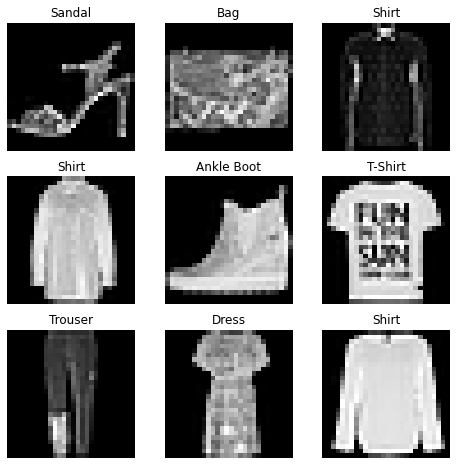

In [22]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8)) # figure instance 생성
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # tensor.item() -> 텐서의 원소가 1개인 경우 원소를 python number로 변환
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i) # 3x3 영역을 만들고 i로 순환
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoader 만들기

- DataLoader는 데이터를 미니 배치 형태로 만들어줌
- 따라서 배치 사이즈와 shuffle 여부 등을 선택
- dataloader를 통해 dataset의 전체 데이터가 batch size로 slice되어 공급 됨
- dataloader는 iterator 형식으로 데이터에 접근하도록 함
- 전체 데이터셋을 batch size로 묶어서 iteration 수만큼 실행
- shuffle은 epoch마다 데이터셋을 섞어 데이터가 학습되는 순서를 바꿈(훈련할 때는 True로 설정하는 것이 좋음)

In [23]:
# DataLoader 만들기
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # 무작위로 데이터를 섞어 한 번에 64개의 이미지를 묶은 배치로 제공
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


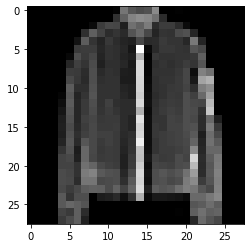

Label: 4


In [24]:
# DataLoader를 통해 반복하기(iterate)
# dataloader는 iterator와 함께 사용해야 함
# 각 iteration은 반복 한 번마다 batch_size 크기의 특징(feature)과 정답(label) 묶음을 tuple로 반환
# dataset이 1장의 이미지와 1개의 label을 반환하는데, 이것이 batch_size만큼 묶어져 있는 것임
train_features, train_labels = next(iter(train_dataloader)) # train_dataloader를 iterable 객체로 만들어 next() 함수로 반복

# tensor.shape == tensor.size() 
print(f"Feature batch shape: {train_features.size()}") # 64장의 이미지(배치 사이즈) x 1(chaennel) x 28(width) x 28(height)
print(f"Labels batch shape: {train_labels.size()}") # 64장 이미지에 대한 label

img = train_features[0].squeeze() # 첫번째 이미지 선택 1 x 28 x 28
# matplotlib에서 grayscale 이미지를 볼 때는 데이터가 2차원이어야 하므로 channel을 없애는 squeeze 메서드 사용
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Custom Dataset, Custom Preprocessing, Data Loader 만들기

In [ ]:
# 미리 이미지들을 같은 클래스 별로 폴더에 정리한 경우
# ImageFolder를 사용하면 별도의 라벨링이 필요 없고 자동으로 라벨링을 함
# ImageFolder를 사용하려면 기본적으로 data 디렉토리가 기본 골격을 지켜줘야 함
# data 디렉토리 안에 train, test 폴더가 있고, 그 안에 각각 class 명 폴더들이 있어야 함. 
# ex : data/train/pizze,steak,sushi  | data/test/pizze,steak,sushi
""" 
ImgageFolder(
    root = 클래스 디렉토리 상위 path까지만 작성
    transform = torchvision.transforms.Compose한 객체
""" 

transf = tr.Compose([tr.Resize(128), tr.ToTensor()]) # 128 x 128 정사각형 크기로 변환한 후, 이미지를 tensor 형태로 변환
trainset = datasets.ImageFolder(root='./train', transform=transf)
trainloader = DataLoader(trainset, batch_size=1, shuffle=True)

print(trainset.classes) # ex : ['pizze','steak','sushi']
print(trainset.class_to_idx) # ex : {'pizze':0,'steak':1,'sushi':2}


In [ ]:
# label별로 폴더 정리가 되어 있지 않은 경우,
# 이미지 데이터라도 이미지가 아닌 텍스트, 리스트, 배열 등의 다른 형태로 저장되어 있는 경우 등
# ImageFolder를 사용할 수 없는 경우에는 CustomDataset 클래스를 만들어 불러와야 함

# 간단한 Custom Dataset/Transform/DataLoader 만들기
# CustomDataset 함수에는 반드시 __init__(), __len__, __getitem__ 메서드가 있어야 함

class CustomDataset(Dataset):# Dataset을 상속 받아 DataLoader에서 배치 단위로 불러올 수 있게 해줌
  def __init__(self, np_data, transform=None): # 필요한 변수를 선언
    self.data = np_data
    self.transform = transform # 전처리
    self.len = np_data.shape[0] # 전체 데이터의 개수

  def __len__(self): # 데이터셋의 길이를 반환해주는 함수
    return self.len

  def __getitem__(self, idx): # 데이터셋에서 특정 인덱스에 해당하는 데이터를 가져오는 함수
    sample = self.data[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [ ]:
# Pytorch는 전처리 함수들을 제공
# 제공하지 않는 기능에 대해서는 직접 구현이 필요
# 이미지의 경우 PIL Image 타입이거나 Tensor 타입일 때 Pytorch가 제공하는 전처리 함수들을 사용 가능
# custom preprocessing
class ToTensor:
    def __call__(self, sample): # call 함수를 사용하여 ToTensor를 사용
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = torch.permute(2,0,1)
        return inputs, torch.LongTensor(labels)

In [ ]:
# custom preprocessing
# 이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 data augmentation 방법.
class CutOut:
    def __init__(self, ratio=0.5): # 50% 확률로 CutOut 발생
        self.ratio = int(1/ratio)

    def __call__(self, inputs):
        active = int(np.random.radint(0, self.ratio, 1)) # 0,1 중 하나를 뽑음

        if active == 0: # active가 0이면 CutOut 발생
            _, w, h = inputs.size() # input은 (channel, width, height)로 구성되어 있음
            min_len = min(w,h)
            box_size = int(min_len/4) # CutOut 박스 크기를 25%로 설정
            idx = int(np.random.randint(0, min_len - box_size, 1)) # idx를 box의 좌측 상단 꼭짓점으로 설정 
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0 # 박스 크기에 해당 하는 pixel들을 0으로 설정

        return inputs

In [ ]:
# custom preprocessing
def square(sample):
  return sample**2

In [ ]:
# 위에 만든 square 함수를 transform으로 사용하기
# torchvision.transforms.Compose([함수 이름]) 사용
# 원하는 전처리를 차례대로 넣어줌
trans = tr.Compose([square])

In [ ]:
np_data = np.arange(10)

custom_dataset = CustomDataset(np_data, transform=trans)

In [ ]:
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [ ]:
list(custom_dataloader) # batch size인 2씩 묶어서 보관

In [ ]:
for _ in range(3): # 단순 반복으로 위해 인덱스가 필요없는 경우 _ 사용
  for data in custom_dataloader:
    print(data) # shuffle=True이기 때문에 for문마다 다른 형태의 batch를 출력
  print("="*20)

## Model

In [26]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Model class 만들기

In [27]:
class NeuralNetwork(nn.Module): # nn.Module 상속
    def __init__(self): # 모델에서 사용되어야 할 모듈, 활성화 함수 등을 정의
        super(NeuralNetwork, self).__init__() # 부모 클래스 initializer
        self.flatten = nn.Flatten() # 파라미터가 없으면 dim=0 은 유지되고 나머지 차원은 합쳐짐
        self.linear_relu_stack = nn.Sequential( 
            # nn.Sequential 클래스는 nn.Linear, nn.ReLU(활성화 함수) 같은 모듈들을 인수로 받아서 
            # 순서대로 정렬해놓고 입력값이 들어모면 순서대로 모듈을 실행해서 결과값을 리턴
            nn.Linear(28*28, 128), # nn.Linear(입력 변수의 개수, 출력 변수의 개수, bias=True(default))
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    # model에 데이터가 전달되면 forward 메서드가 실행됨
    def forward(self, x): # 모델에서 실행되어야 할 연산을 정의
    ## nn.Module을 상속받은 모든 클래스는 forward 메서드에 입력 데이터에 대한 연산을 구현해야 됨
        x = self.flatten(x) # 만약 (64,1,28,28)을 flatten하면 (64, 784)가 됨
        logits = self.linear_relu_stack(x)
        return logits # network의 output

In [28]:
# flatten 예시
# 한 이미지의 픽셀들이 하나의 행으로 펼쳐짐
tensor = torch.randint(5, size = (3,1,3,3))
print(tensor)
flatten = nn.Flatten()
tensor = flatten(tensor)
print(tensor)

tensor([[[[2, 4, 1],
          [4, 4, 1],
          [2, 4, 3]]],


        [[[1, 1, 3],
          [2, 2, 1],
          [0, 0, 3]]],


        [[[2, 3, 2],
          [1, 2, 4],
          [2, 3, 2]]]])
tensor([[2, 4, 1, 4, 4, 1, 2, 4, 3],
        [1, 1, 3, 2, 2, 1, 0, 0, 3],
        [2, 3, 2, 1, 2, 4, 2, 3, 2]])


In [29]:
# Model instance 생성하고 device로 이동
model = NeuralNetwork().to(device)

print(list(model.modules()))

[NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
), Flatten(start_dim=1, end_dim=-1), Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=128, out_features=10, bias=True)
), Linear(in_features=784, out_features=128, bias=True), ReLU(), Dropout(p=0.2, inplace=False), Linear(in_features=128, out_features=10, bias=True)]


In [31]:
# 가상의 data 만들어서 예측해보기
X = torch.rand(5, 28, 28, device=device)
logits = model(X) # model에 입력 데이터를 전달하면 model.forward()가 실행됨
print(logits)

# 마지막 선형 계층에서 출력된 logit(각 클래스별 예측 확률)을 softmax를 통해 [0,1] 범위로 조정
softmax = nn.Softmax(dim=1) # dim 매개변수는 값의 합이 1이 되는 차원을 나타냄
pred_probab = softmax(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[ 1.8752e-01,  1.6895e-01, -8.7737e-03, -8.5801e-02, -2.6760e-01,
          4.8808e-02,  2.4716e-01,  1.3386e-01,  6.8170e-02,  9.2574e-02],
        [ 2.2955e-01, -1.2770e-01, -4.7872e-02,  3.3482e-02, -2.4965e-01,
          2.0937e-02,  3.3699e-01,  1.4184e-01, -5.9214e-02, -4.8732e-02],
        [-6.5289e-02, -3.1661e-02,  3.9128e-02, -1.6933e-01, -1.9769e-01,
          1.4394e-02,  1.7142e-01,  1.1224e-01, -6.4943e-02, -3.4506e-05],
        [ 8.5163e-02, -1.0232e-01,  7.4631e-02, -2.6933e-01, -2.4994e-01,
          8.3346e-03,  2.6712e-01,  1.6204e-01, -7.5949e-02,  9.2766e-02],
        [ 2.1322e-01,  5.3809e-02,  4.6906e-02, -2.6184e-01, -2.8809e-01,
          1.7863e-02,  2.7253e-01,  2.1797e-01, -5.8307e-02,  2.2191e-02]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.1127, 0.1106, 0.0926, 0.0857, 0.0715, 0.0981, 0.1196, 0.1068, 0.1000,
         0.1025],
        [0.1213, 0.0848, 0.0919, 0.0997, 0.0751, 0.0984, 0.1350, 0.1111, 0.0909,
         0.0918],
      

In [34]:
# softmax
a = torch.tensor( [1,2,4,3,5,5], dtype=torch.float32)
a = a.view(3,2)
print(a)
print(a.shape)

softmax = nn.Softmax(dim=0) # 행의 방향으로 합이 1이 되게 확률로 변환
softmax_a = softmax(a)
print(softmax_a)

tensor([[1., 2.],
        [4., 3.],
        [5., 5.]])
torch.Size([3, 2])
tensor([[0.0132, 0.0420],
        [0.2654, 0.1142],
        [0.7214, 0.8438]])


### Activation Function

- sigmoid
```python
torch.sigmoid()
nn.Sigmoid()
```
- tanh
```python
torch.tanh()
nn.Tanh()
```
- ReLU
```python
torch.nn.functional.relu()
nn.ReLU()
```
- softmax
```python
torch.nn.functional.softmax()
nn.Softmax()
```
- etc
```python
nn.ELU()
nn.LeackyReLU()
nn.SELU()
```

#### Loss Function


- MAE
```python
torch.nn.L1Loss()
```
- MSE
```python
torch.nn.MSELoss()
```
- ReLU
```python
torch.nn.CrossEntropyLoss()
```
- etc
```python
nn.BCELoss()
nn.NLLoss()
nn.KLDivLoss()
```

In [35]:
# 손실 함수를 초기화합니다.
loss_fn = nn.CrossEntropyLoss()

### Optimizer

- SGD
```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
```
- Adam
```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
```

In [36]:
learning_rate = 1e-3
weight_decay = 1e-7 # L2 norm에서의 penalty 값

# 신경망 내부의 많은 계층들은 매개변수화됨
# nn.Module을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적(track)되며,
# 모델의 parameters() 메서드로 모든 매개변수에 접근할 수 있음
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = weight_decay) # 최적화 방법에 모델 파라미터를 넣어 줄 때는 models.parameters() 라고 입력

## Training / Validation

### Training / Validation(Test) Function

In [47]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) # dataloader를 만든 dataset으로 접근

    # batch index가 필요할 경우에 enumerate를 사용
    # batch에는 minibatch index가 들어감
    # (X,y)에는 data가 들어감
    # dataloader는 튜플 형태이므로 (X, y) 형태로 받음
    # X = 64장의 이미지, y에는 64장 이미지의 label이 들어감
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device) # data와 label을 device로 이동
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # nn.Module()을 상속받은 모델들은 모든 텐서들에 대해 default로 requires_grad=True로 
        # 설정 되어있기 때문에 weight나 bias에 대해서 requires_grad=True로 설정할 필요가 없음 
        # 모든 가중치들의 값을 초기화하는 것이 아닌 가중치들의 미분값을 초기화함
        optimizer.zero_grad() # gradient 0으로 초기화

        # backporpagation에서 gradient를 계산하는 starting point가 되는 값은 loss 값임
        # loss 값을 모든 가중치들에 대해서 미분을 계산해야하므로
        # backward() 메서드는 gradient 계산이 시작되는 지점인 loss 변수에 적용
        # backward() 메서드는 loss에 대해 weight들의 미분 값을 계산하고 미분 값들을 container에 저장한다
        # 그런데 backward()가 실행될때마다 container의 길이가 늘어나는 것이 아니라, 원래 값에 더해진다(축적)
        # 따라서 optimizer.zero_grad()를 통해 가중치들의 미분값을 초기화해야 함
        # 추가로 backward() 메서드는 암묵적으로 loss 값이 벡터가 아닌 scalar(스칼라 텐서)라고 가정을 하기 때문에
        # 최종 loss 값에 평균이나 합을 통해 벡터를 하나의 scalar 값(스칼라 텐서)으로 만들어 줘야 함
        loss.backward() # backpropagation

        # 가중치 미분값이 아닌 가중치값들은 batch가 지날수록, 에폭이 증가할수록
        # 값이 업데이트되므로 정확도가 올라감
        optimizer.step() # weight와 bias를 update

        if batch % 100 == 0: # batch가 100번 돌 때마다 loss를 출력
            loss, current = loss.item(), batch * len(X) # loss.item() = 스칼라 텐서의 값을 뽑음 / len(x) = 미니배치 내의 데이터 개수
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Test를 위한 함수
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader) # minibatch의 개수
    test_loss, correct = 0, 0

    with torch.no_grad(): # gradient를 계산 안 함. 메모리 효율
        model.eval() # dropout 같은 정규화 기법은 훈련시에만 적용해야 하므로 학습시에만 동작하는 장치들을 비활성화
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item() # 손실
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # 정답 맞춘 개수

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [48]:
# 학습 진행하기
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.247314  [    0/60000]
loss: 0.257679  [ 6400/60000]
loss: 0.318899  [12800/60000]
loss: 0.162793  [19200/60000]
loss: 0.378963  [25600/60000]
loss: 0.425428  [32000/60000]
loss: 0.361284  [38400/60000]
loss: 0.306962  [44800/60000]
loss: 0.294511  [51200/60000]
loss: 0.165196  [57600/60000]
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.346658 

Epoch 2
-------------------------------
loss: 0.200392  [    0/60000]
loss: 0.326990  [ 6400/60000]
loss: 0.332610  [12800/60000]
loss: 0.221047  [19200/60000]
loss: 0.245325  [25600/60000]
loss: 0.257026  [32000/60000]
loss: 0.290175  [38400/60000]
loss: 0.169416  [44800/60000]
loss: 0.350078  [51200/60000]
loss: 0.252112  [57600/60000]
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.348052 

Epoch 3
-------------------------------
loss: 0.344772  [    0/60000]
loss: 0.263578  [ 6400/60000]
loss: 0.230870  [12800/60000]
loss: 0.325192  [19200/60000]
loss: 0.177149  [25600/60000]
loss: 0.379645  [32000/600

## Model 저장하고 불러오기

#### parameter만 저장하고 불러오기

In [ ]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
# 새 Model instance 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# test
# 모델을 훈련하지 않아 정확도는 당연히 낮음
model2.eval() # 훈련하지 않는다는 표시
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.0%, Avg loss: 0.335180 



In [ ]:
# 저장한 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [ ]:
# test
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.0%, Avg loss: 0.335180 



### Model 전체를 저장하고 불러오기

In [ ]:
# 저장하기
torch.save(model, 'model.pth')

In [ ]:
# 불러오기
model3 = torch.load('model.pth')

In [ ]:
# test
model3.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.0%, Avg loss: 0.335180 

